# 1. Define Problem Statement and perform Exploratory Data Analysis (EDA):

## 1A. Define Problem Statement:
  1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
  2. How well those variables describe the electric cycle demands?
  3. Analyzing Factors Affecting Demand for Yulu's Shared Electric Cycles in India.

## 1B. Perform Exploratory Data Analysis (EDA):
1. Importing the libraries.

2. Reading the dataset.

3. Looking at the dataset.

4. Observations on shape of data and examining structure of dataset.

5. Basic information about the dataset and checking data types of all the attributes.

6. Statistical summary.

7. Conversion of categorical attributes to 'category' (If required).

8. Find what is the time period for which the data is given.

9. Missing value detection and perform Imputation using an appropriate method.

10. Identify and remove duplicate records.

11. Univariate Analysis (Distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables). Comment on these univariate plots.

12. Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count). Comment on these bivariate plots.

13. Check for Outliers and deal with them accordingly.

14. Establish a Relationship between Dependent and Independent Variables.

# Importing Libraries

In [1]:
import numpy as np   # linear algebra

import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # data visualization

import seaborn as sns  # data visualization

import datetime as dt  # working with dates and times

import scipy.stats as spy  # statistical analysis

import statsmodels.api as sm  # statistical analysis

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu  # perform hypothesis testing

import warnings  # control how warnings are handled
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
df = pd.read_csv("bike_sharing.csv")
df.head()#dataset overview

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Shape of the dataset

In [4]:
df.shape

(10886, 12)

## Columns in the dataset

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


# Datatype of the columns:

In [3]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


# Basic information about the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Basic statistical information about the dataset:

In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.

* The difference between mean and median is much heigher in count columns hence finding out the outlier by using IQR technique and removing it would be good.

In [6]:
df.describe(include = 'object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1



# Datatype of following attributes needs to changed to proper data type:

* **datetime - to datetime**
* **season - to categorical**
* **holiday - to categorical**
* **workingday - to categorical**
* **weather - to categorical**

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
cat_col=['season','holiday','workingday','weather']
for col in cat_col:
    df[col]=df[col].astype('object')

In [9]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


# Observation-
* There are no missing values in the dataset.
* casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [10]:
np.any(df.isna())

False

In [12]:
df.describe(include = 'object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [13]:
df.describe(include = 'datetime')

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


In [14]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

# Observation-
* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

# Missing value detection and perform imputation:

In [15]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


# Identify and remove duplicate records:

In [16]:
np.any(df.duplicated())

False

# Observation-
* There are no duplicate values in the dataset.

In [17]:
df['season'].unique()

array([1, 2, 3, 4], dtype=object)

In [18]:
df['holiday'].unique()

array([0, 1], dtype=object)

In [19]:
df['workingday'].unique()

array([0, 1], dtype=object)

In [20]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [21]:
df[cat_col].melt().groupby(['variable','value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

## Column Profiling : Basic information about the values present in the dataset



*   **datetime**: datetime
*   **season**: season (1: spring, 2: summer,
     3: fall, 4: winter)
*   **holiday**: whether day is a holiday or
     not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*   **workingday**:if day is neither weekend
    nor holiday is 1, otherwise is 0.
*   **weather**:
    1.   Clear, Few clouds, partly cloudy,
         partly cloudy
    2.   Mist + Cloudy, Mist + Broken clouds,
         Mist + Few clouds, Mist
    3.   Light Snow, Light Rain + Thunderstorm
         + Scattered clouds, Light Rain + Scattered clouds
    4.   Heavy Rain + Ice Pallets +   
         Thunderstorm + Mist, Snow + Fog
*    **temp**: temperature in Celsius

*    **atemp**: feeling temperature in Celsius

*    **humidity**: humidity

*    **windspeed**: wind speed

*    **casual**: count of casual users

*    **registered**: count of registered users

*    **count**: count of total rental bikes including both casual and registered


# Univariate Analysis(Plots of all the continuous variables)

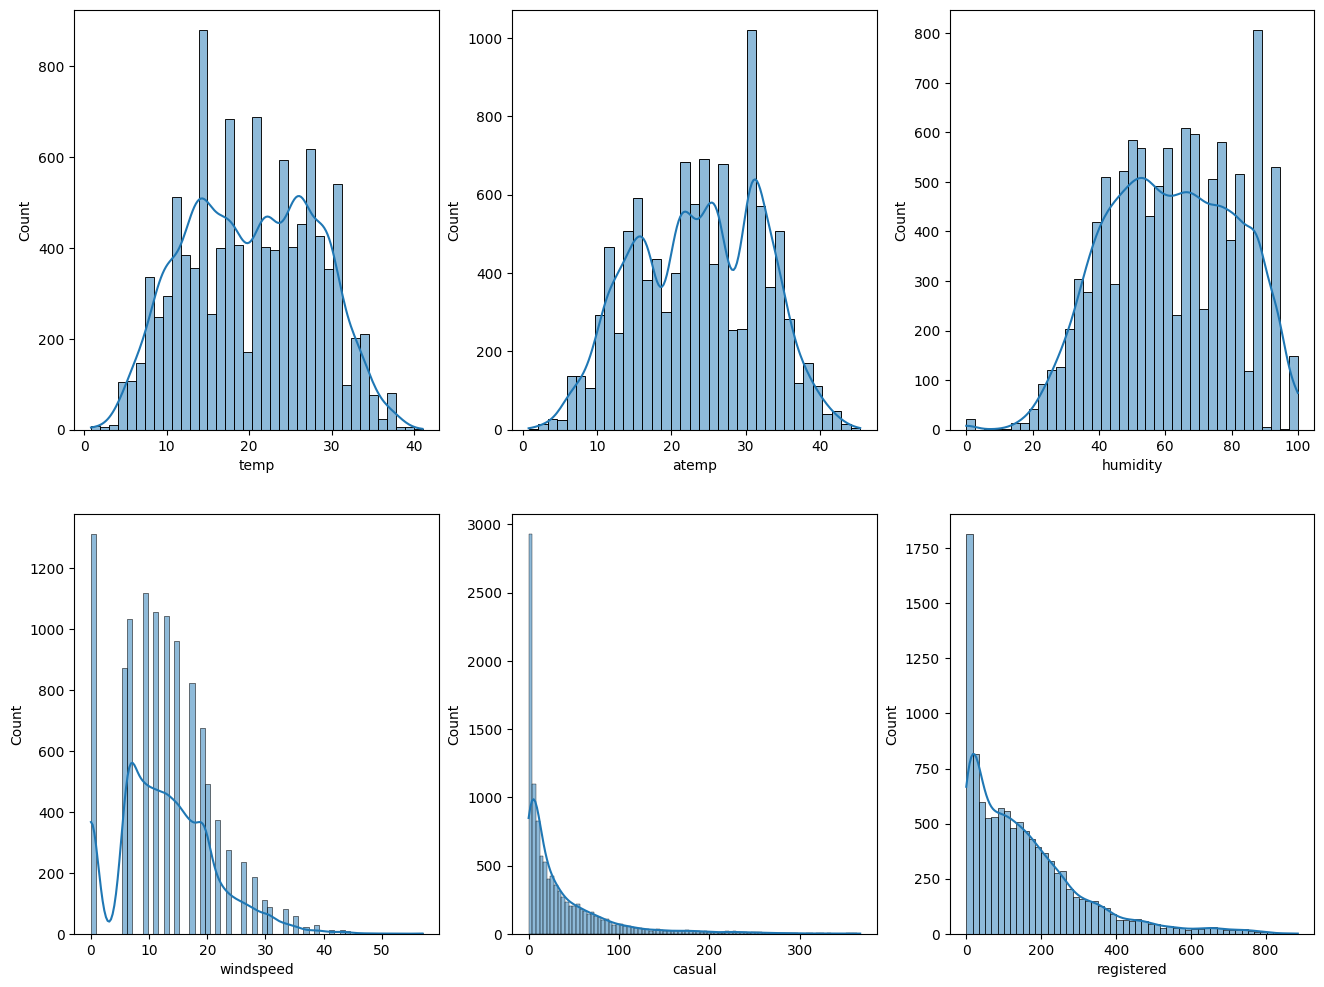

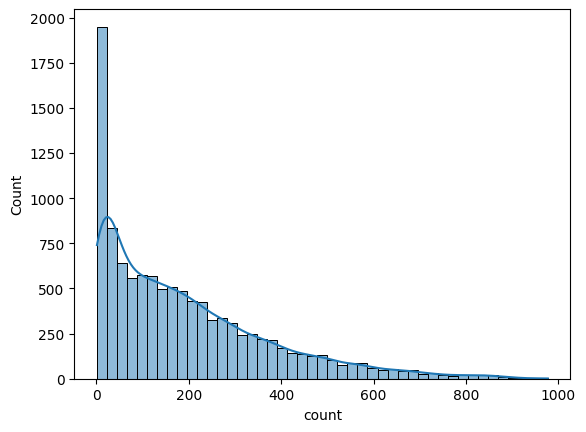

In [25]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

*   **casual**, **registered** and **count** somewhat looks like **Log Normal Distrinution**
*   **temp**, **atemp** and **humidity** looks like they
follows the **Normal Distribution**
*   **windspeed** follows the **binomial distribution**

In [27]:
distribution_of_temperature = df['temp'].value_counts(bins=5)
distribution_of_atemp = df["atemp"].value_counts(bins = 5)
distribution_of_humidity = df["humidity"].value_counts(bins = 5)
distribution_of_windspeed = df["windspeed"].value_counts(bins = 5)

print("Distribution of Temperature:")
print(distribution_of_temperature)
print("\nDistribution of Feeling Temperature:")
print(distribution_of_atemp)
print("\nDistribution of Humidity:")
print(distribution_of_humidity)
print("\nDistribution of Windspeed:")
print(distribution_of_windspeed)

Distribution of Temperature:
(16.892, 24.928]    3340
(8.856, 16.892]     3331
(24.928, 32.964]    3095
(0.779, 8.856]       717
(32.964, 41.0]       403
Name: count, dtype: int64

Distribution of Feeling Temperature:
(18.638, 27.577]    3752
(27.577, 36.516]    3257
(9.699, 18.638]     2922
(36.516, 45.455]     505
(0.714, 9.699]       450
Name: count, dtype: int64

Distribution of Humidity:
(40.0, 60.0]      3564
(60.0, 80.0]      3382
(80.0, 100.0]     2302
(20.0, 40.0]      1560
(-0.101, 20.0]      78
Name: count, dtype: int64

Distribution of Windspeed:
(-0.058, 11.399]    5396
(11.399, 22.799]    4367
(22.799, 34.198]     976
(34.198, 45.598]     138
(45.598, 56.997]       9
Name: count, dtype: int64


# Observation-
* Maximum usage of bike is under temp 8.85 to 32.96 (temperature in Celsius)
* Maximum usage of bike is under temp 18.64 to 36.52(feeling temperature in Celsius)
* Maximum renting of cycles is done under the humidity between 40 to 80
* Maximum renting of cycles is done under the wind speed of range -0.058 to 22.799

# Univariate Analysis (Plots of all the categorical variables):

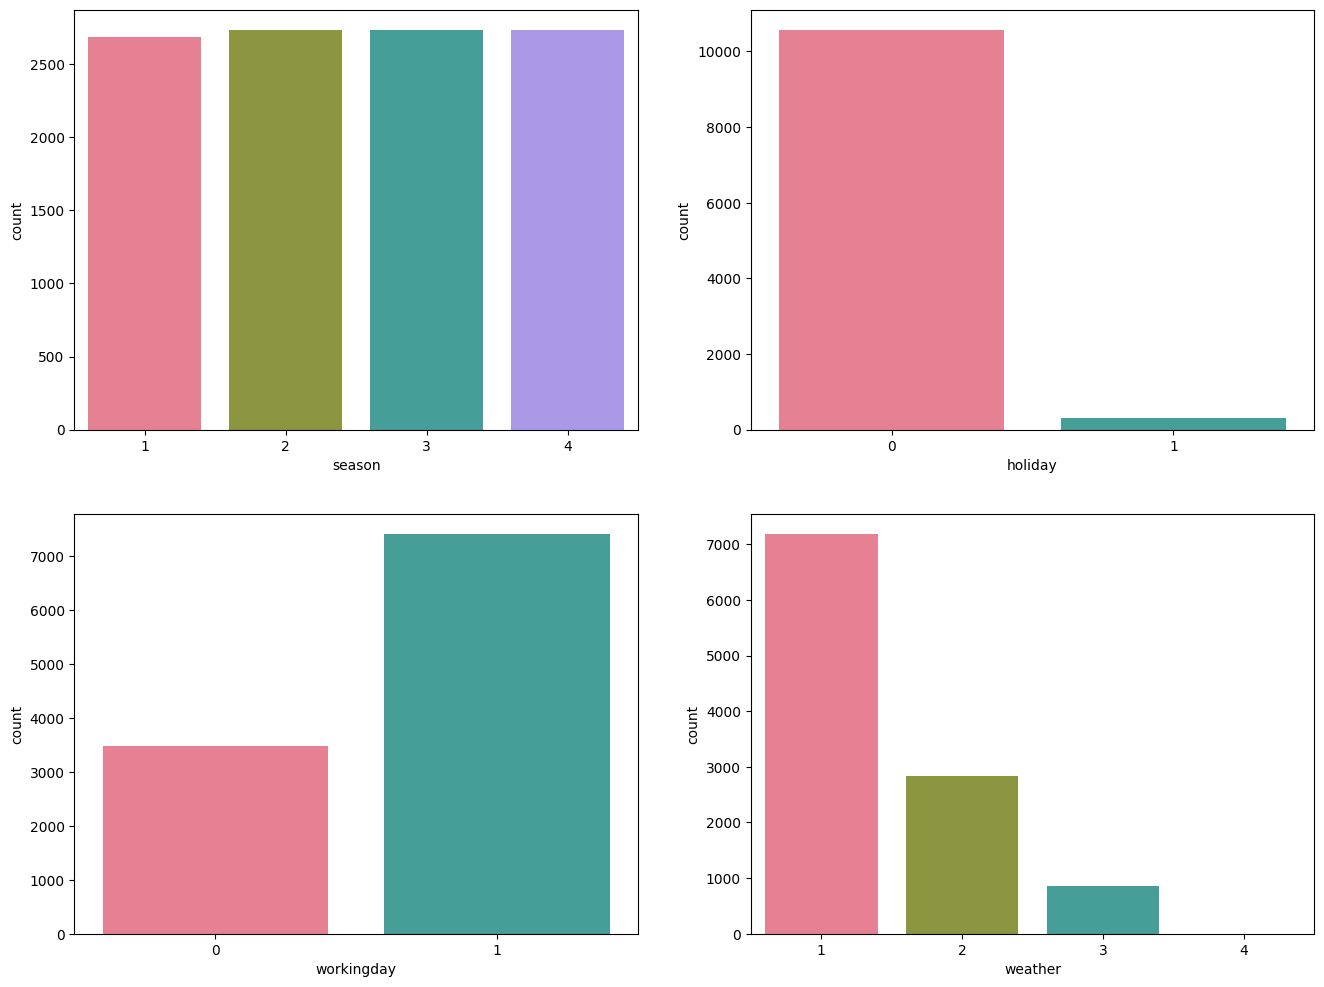

In [30]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df, x=cat_col[index], ax=axis[row, col], palette='husl')
    index += 1
plt.show()

# Univariate Analysis (Pie charts of all the categorical variables):

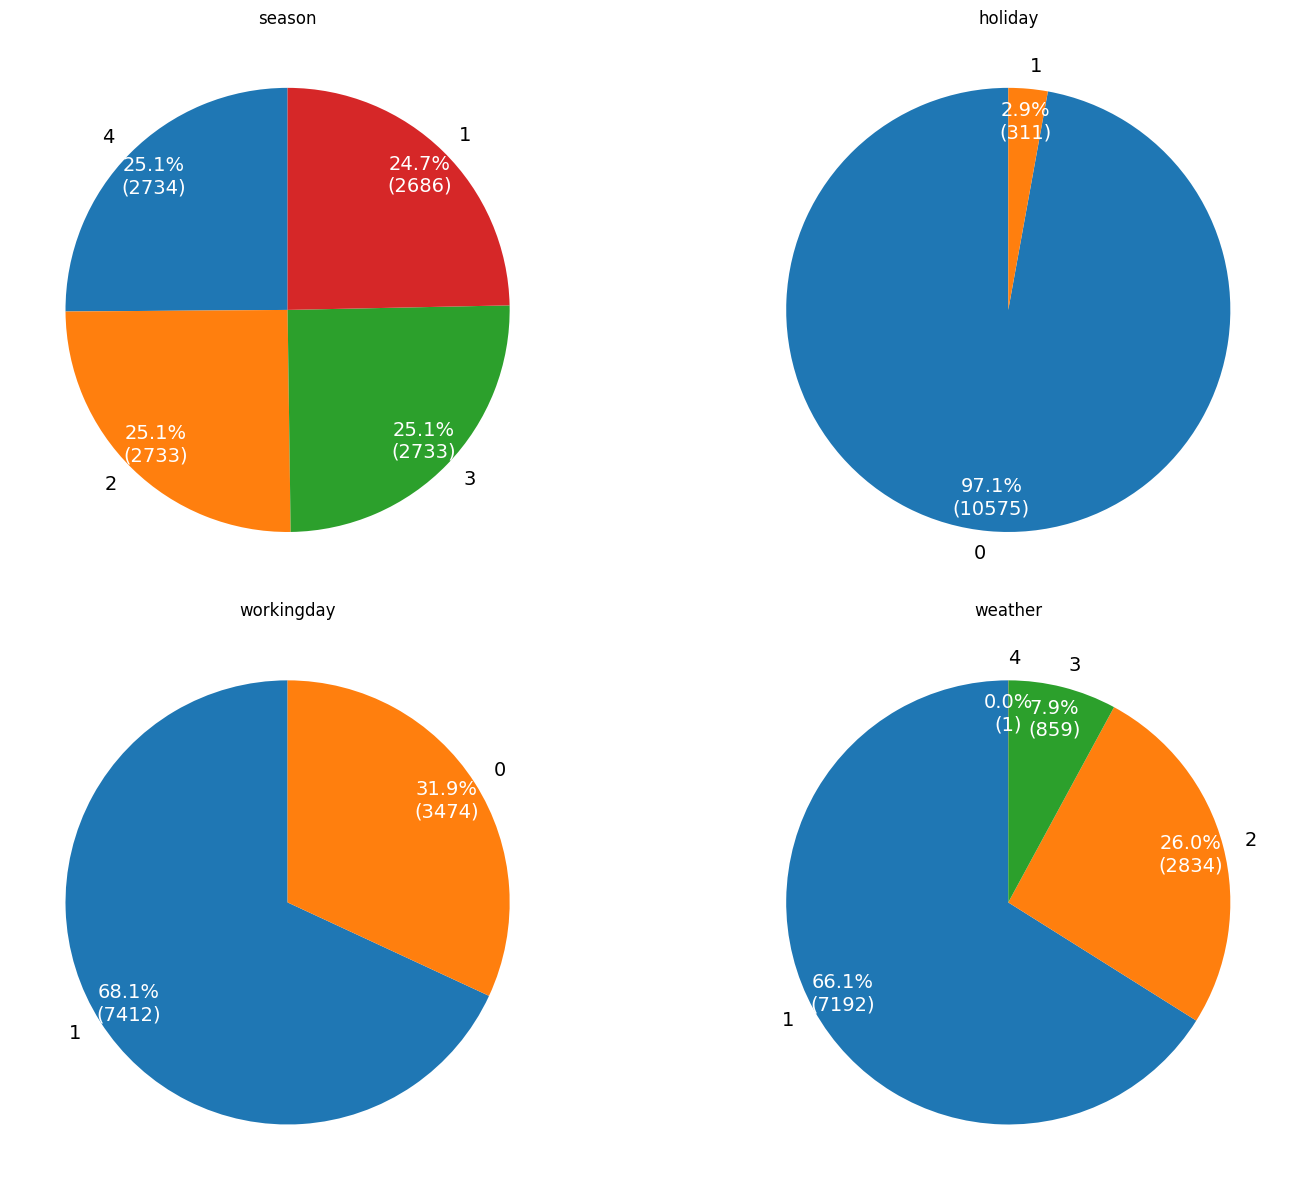

In [31]:
# Define the categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows = 2,  # Create a 2x2 grid for subplots
                         ncols = 2,
                         figsize = (16, 12))

index = 0

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

for row in range(2):
    for col in range(2):
        counts = df[cat_cols[index]].value_counts()  # Count the occurrences of each category

        # Create a pie chart with customized percentage formatting
        wedges, texts, autotexts = axis[row, col].pie(
            counts,
            labels = counts.index,
            autopct = autopct_format(counts),
            startangle = 90,
            textprops = {'fontsize': 14},
            pctdistance = 0.85
        )

        for autotext in autotexts:  # Increase the font size of the percentage labels
            autotext.set_fontsize(14)
            autotext.set_color('white')

        axis[row, col].set_title(cat_cols[index])

        index += 1

plt.tight_layout()
plt.show()  # Displaying the plots

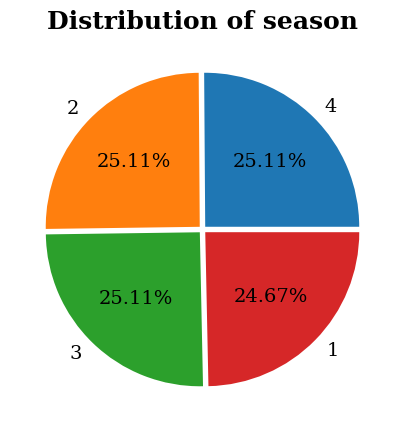

In [40]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5

# Setting the title of the plot
plt.title('Distribution of season', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_season['proportion'],
        labels = df_season.index,
        explode = [0.025, 0.025, 0.025, 0.025],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                     'fontstyle' : 'normal',
                     'fontfamily' : 'serif',
                     'fontweight' : 500})

plt.show()  # Displaying the plot

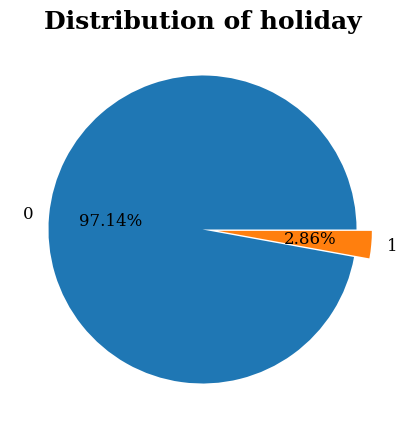

In [42]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5

# Setting the title of the plot
plt.title('Distribution of holiday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_holiday['proportion'],  # Plotting the pie-chart
        explode = [0, 0.1],
        labels = df_holiday.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 12,
                     'fontstyle' : 'normal',
                     'fontfamily' : 'serif',
                     'fontweight' : 500})

plt.show()  # Displaying the plot

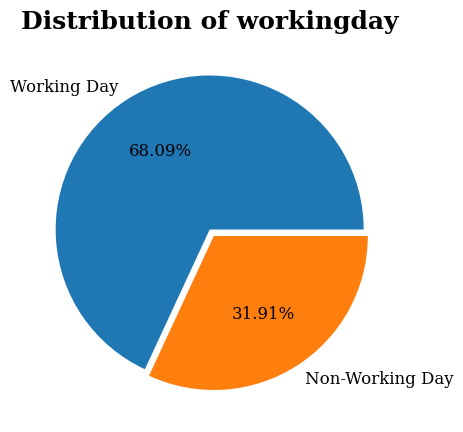

In [43]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5

# Setting the title of the plot
plt.title('Distribution of workingday', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_workingday['proportion'],  # Plotting the pie-chart
        explode = [0, 0.05],
        labels = ['Working Day', 'Non-Working Day'],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 12,
                     'fontstyle' : 'normal',
                     'fontfamily' : 'serif',
                     'fontweight' : 500})

plt.show()  # Displaying the plot

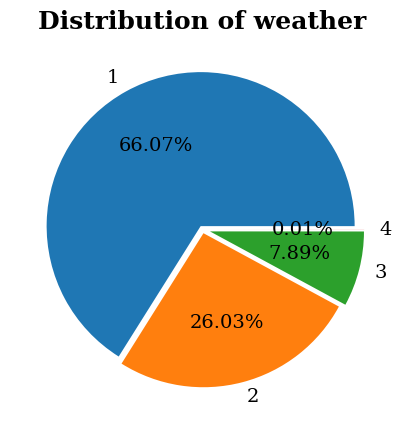

In [44]:
plt.figure(figsize = (5, 5))  # Setting the figure size to 5x5

# Setting the title of the plot
plt.title('Distribution of weather', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'normal',
                                                'fontfamily' : 'serif'})

df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = df_weather['proportion'],  # Plotting the pie-chart
        explode = [0.025, 0.025, 0.05, 0.05],
        labels = df_weather.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                   'fontstyle' : 'normal',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.show()  # Displaying the plot

In [45]:
distribution_of_season = df['season'].value_counts()
distribution_of_holiday = df['holiday'].value_counts()
distribution_of_workingday = df['workingday'].value_counts()
distribution_of_weather = df['weather'].value_counts()

print("Distribution of Season:")
print(distribution_of_season)
print("\nDistribution of Holiday:")
print(distribution_of_holiday)
print("\nDistribution of Working day:")
print(distribution_of_workingday)
print("\nDistribution of Weather:")
print(distribution_of_weather)

Distribution of Season:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Distribution of Holiday:
holiday
0    10575
1      311
Name: count, dtype: int64

Distribution of Working day:
workingday
1    7412
0    3474
Name: count, dtype: int64

Distribution of Weather:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


# Observation-

* In each season count of renting cycles is almost same at around 25%.
* Renting of yulu electric bikes on a holiday is extremely less at 2.9% than other days at 97.1%.
* Usage of yulu electric bikes on working day 68.1% is more than holidays including weekends 31.9%.
* Weather 1 & 2 has maximum usage of yulu electric bikes at 92.1% as compared to weather 3 & 4 at 7.9%. Details of weather 1, 2, 3 and 4 are mentioned in column profiling of the dataset.

# Bivariate Analysis (Relationships between important variables):

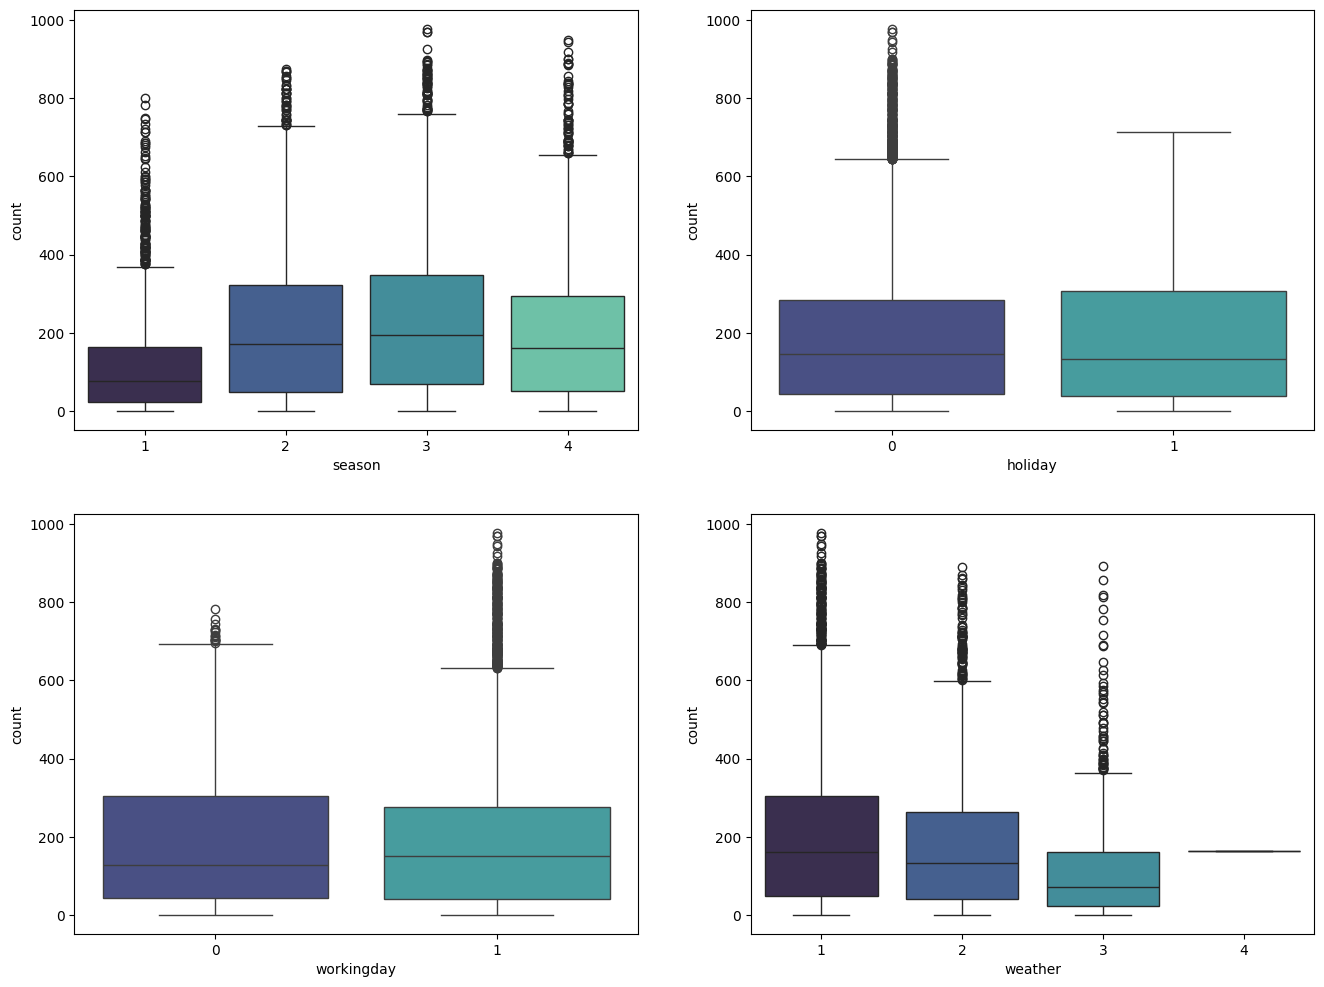

In [50]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_col[index], y='count', ax=axis[row, col], palette='mako')

    index += 1
plt.show()

**Plotting categorical variables vs count using KDE plots-**

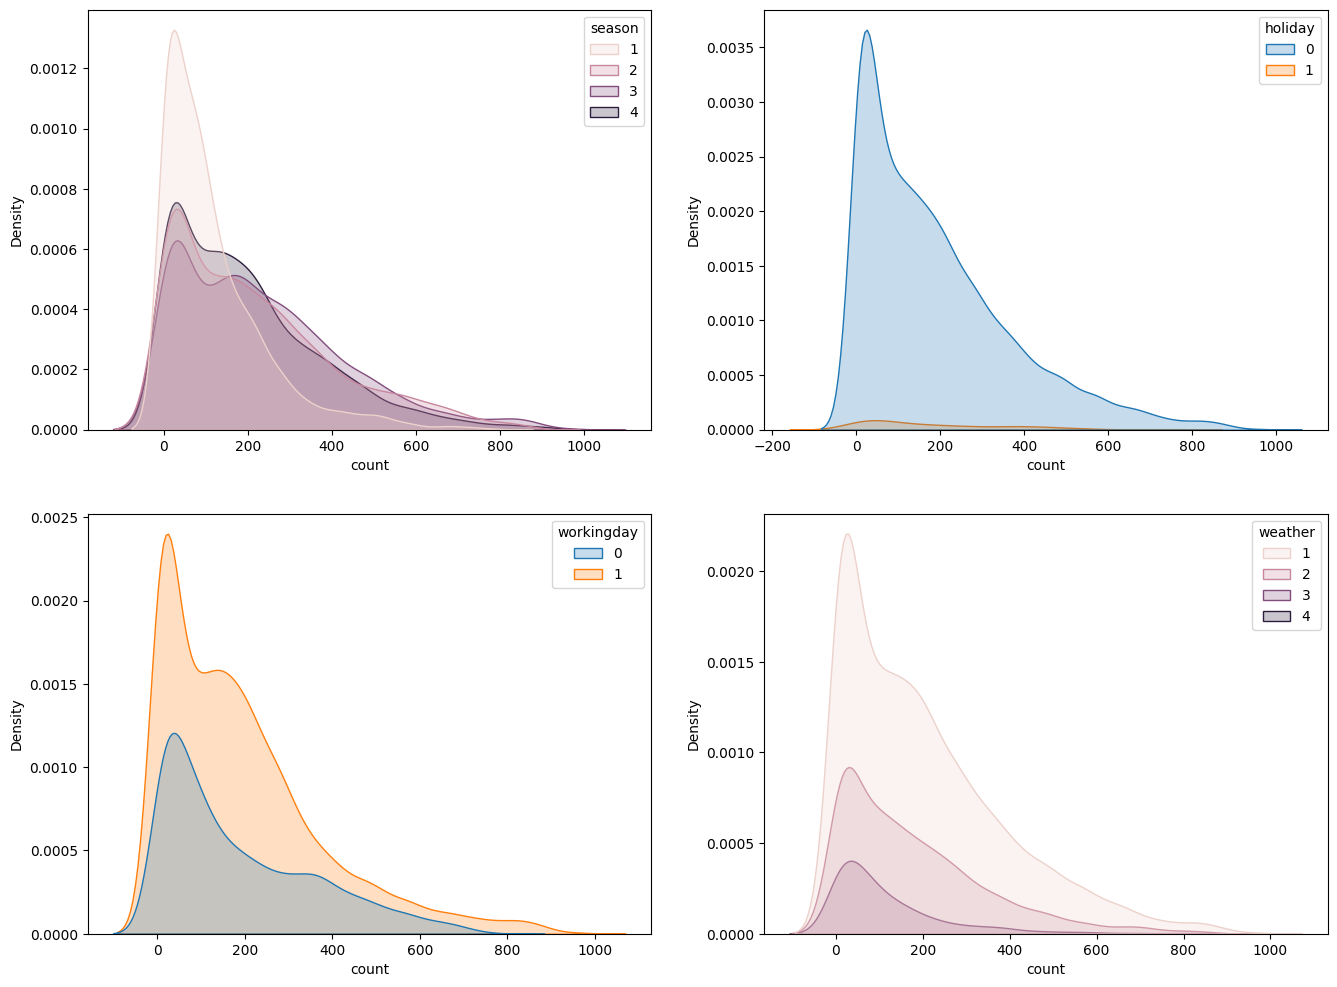

In [51]:
# Define the categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axis = plt.subplots(nrows = 2,  # Setting the figure size to 2x2
                         ncols = 2,
                         figsize = (16, 12))

index = 0

for row in range(2):  # Plotting KDE plots
    for col in range(2):
        sns.kdeplot(x = 'count',
            data = df,
            hue = cat_cols[index],
            color = 'green',
            shade = True,
            ax = axis[row, col])

        index += 1

plt.show() # Displaying the plots


# Observation-
* In summer and fall seasons more bikes are rented as compared to other seasons.
Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.


**Plotting numerical variables vs count using scatterplot**

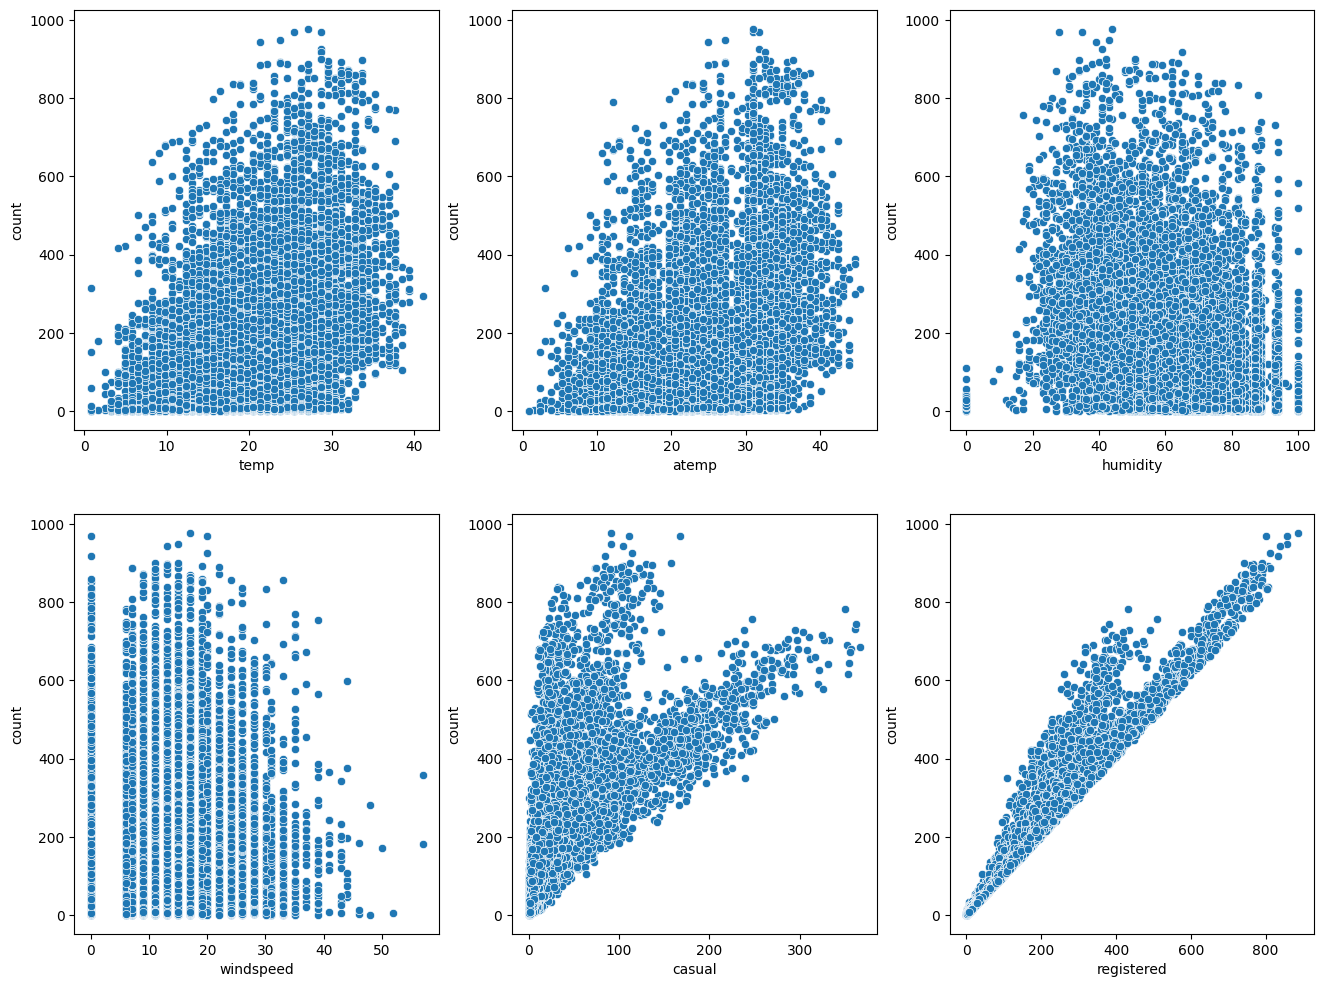

In [52]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row,col])
    index += 1
plt.show()

* Whenever the **humidity** is less than 20, number of bikes rented is very very low.
* Whenever the **temperature** is less than 10, number of bikes rented is less.
* Whenever the **windspeed** is greater than 35, number of bikes rented is less.

**Plotting count vs season, workingday using boxplot-**

[]

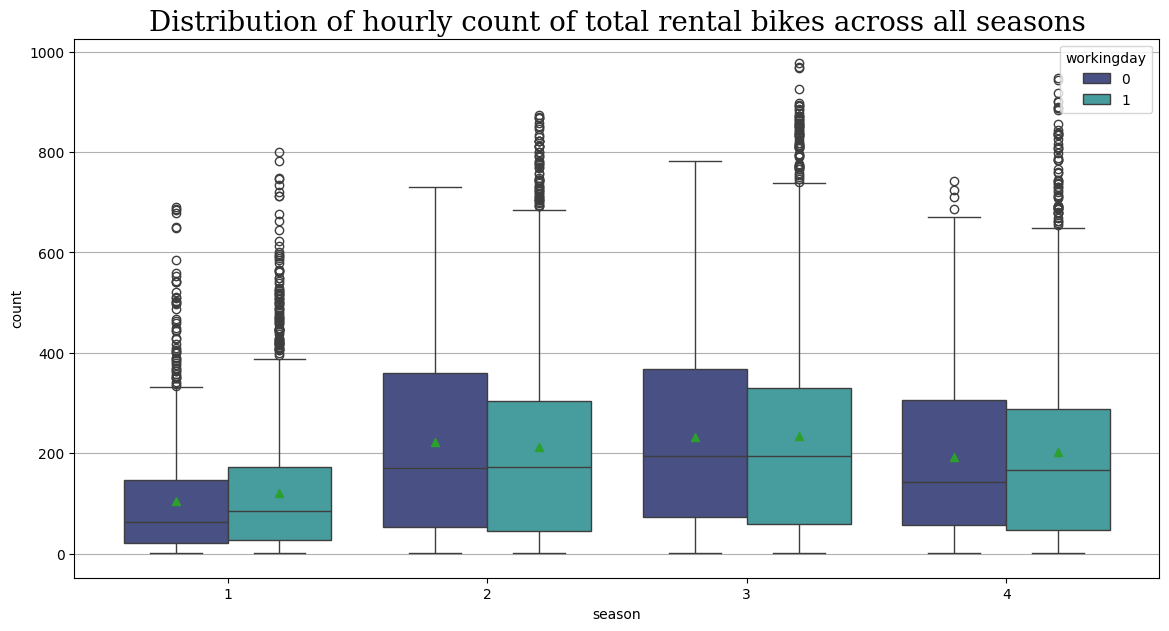

In [54]:
plt.figure(figsize = (14, 7))  # Setting the figure size to 14x7

# Setting the title of the plot
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'normal',
                    'family' : 'serif'})

sns.boxplot(data = df,  # Plotting boxplots
            x = 'season',
            y = 'count',
            hue = 'workingday',
            showmeans = True,palette='mako'
            )

plt.grid(axis = 'y', linestyle = '-')
plt.plot()  # Displaying the plots


**Observation-**
* The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

**Plotting count vs weather, workingday using boxplot-**

[]

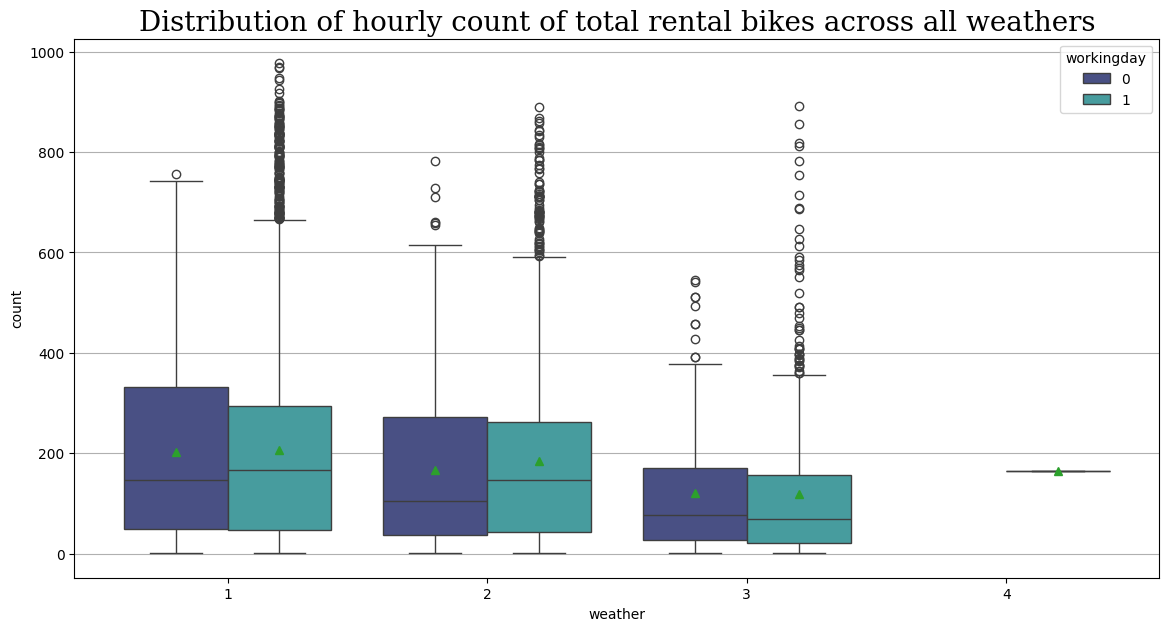

In [55]:

plt.figure(figsize = (14, 7))  # Setting the figure size to 14x7

# Setting the title of the plot
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'normal',
                    'family' : 'serif'})

sns.boxplot(data = df,  # Plotting boxplots
            x = 'weather',
            y = 'count',
            hue = 'workingday',
            showmeans = True,palette='mako')

plt.grid(axis = 'y', linestyle = '-')
plt.plot()  # Displaying the plots

**Observation-**
* The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.


**Plotting jointplot of count, temperature and season-**

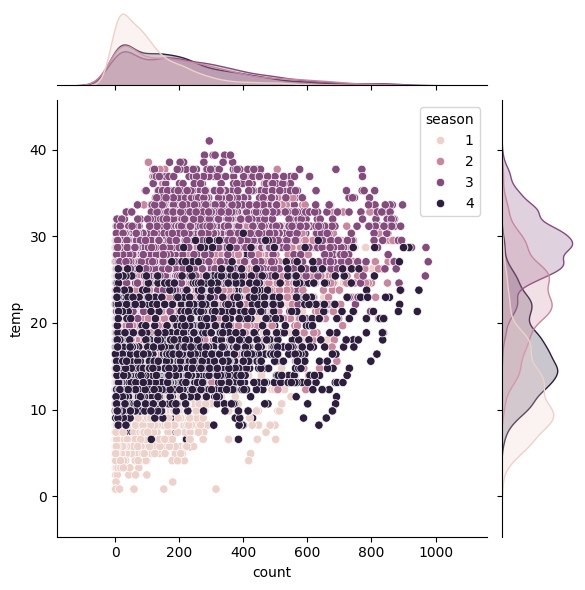

In [56]:
sns.jointplot(x = "count",  # Plotting jointplot of count, temperature and season
              y = "temp",
              data = df,
              hue = "season")

plt.show()  # Displaying the plot

**Plotting jointplot of count, temperature and workingday-**

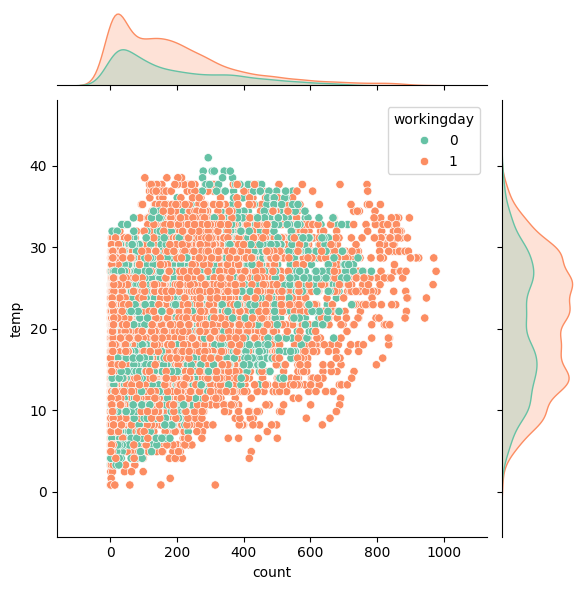

In [57]:

sns.jointplot(x = "count",  # Plotting jointplot of count, temperature and workingday
              y = "temp",
              data = df,
              hue = "workingday",
              palette = "Set2")

plt.show()  # Displaying the plot

**Plotting jointplot of count, temperature and weather-**

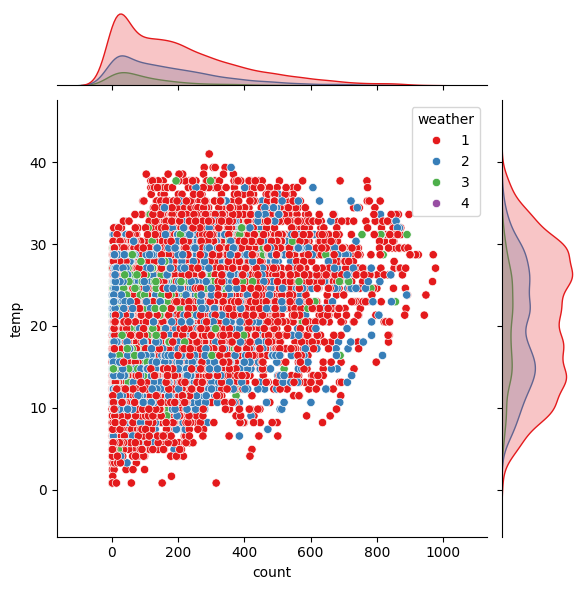

In [58]:
sns.jointplot(x = "count",  # Plotting jointplot of count, temperature and weather
              y = "temp",
              data = df,
              hue = "weather",
              palette = "Set1")

plt.show()  # Displaying the plot


**Observation-**
* These plots gives us relationship of bike usage count vs temperature, season, workingday and weather variables

# Check for Outliers and deal with them accordingly:

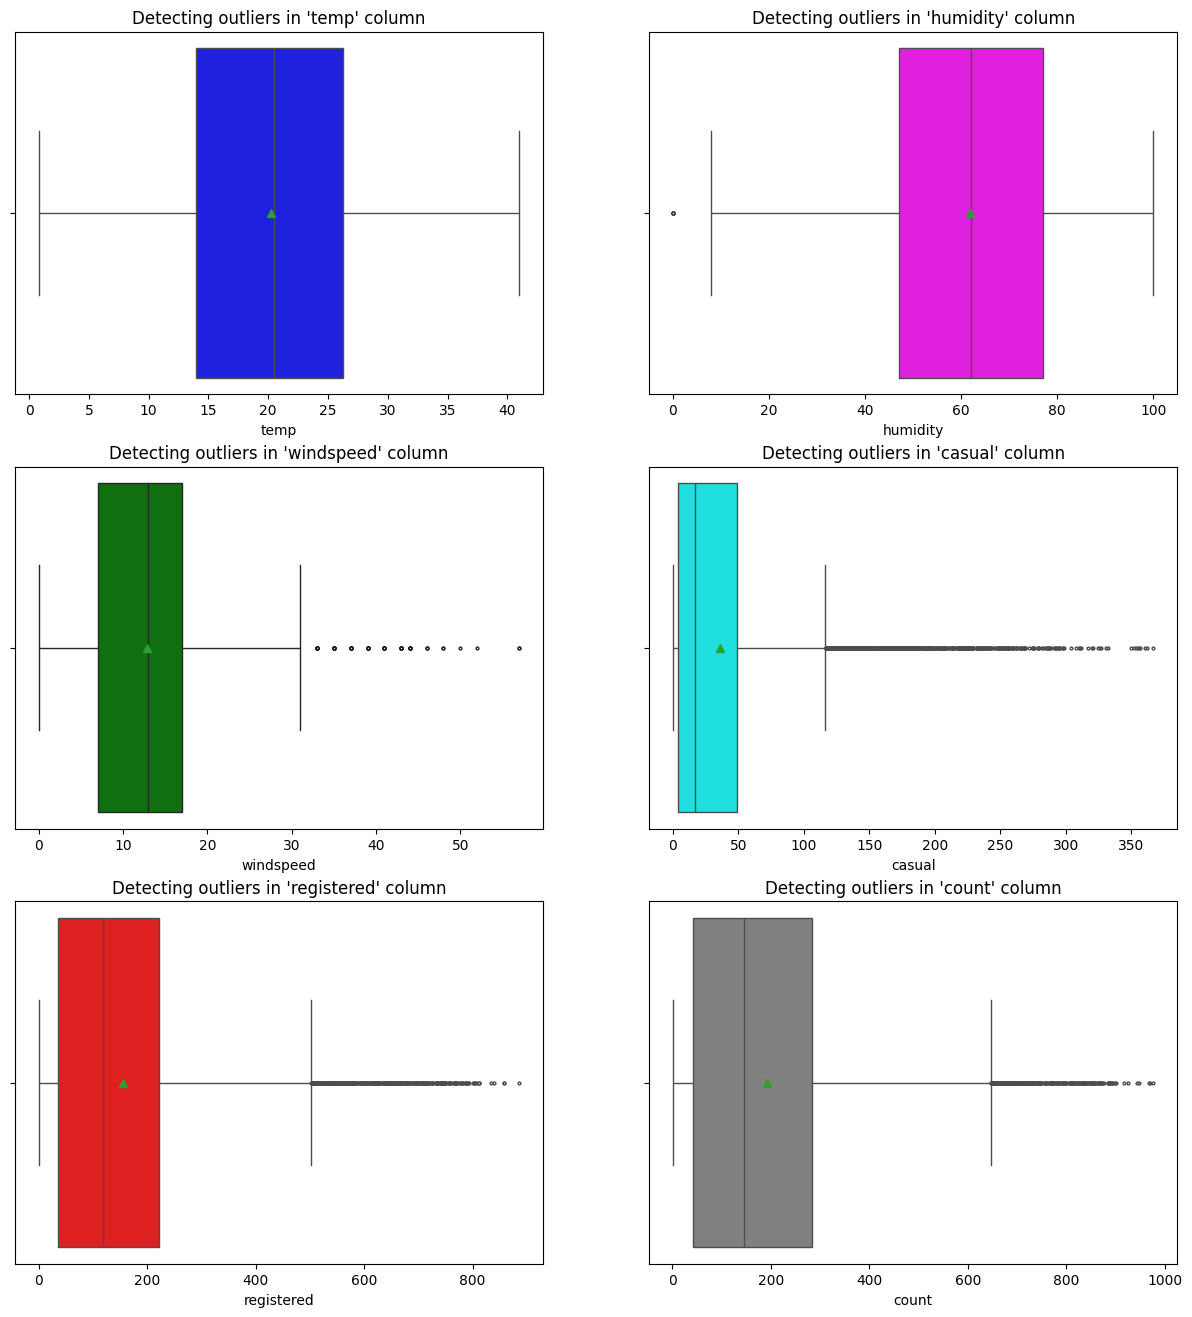

In [59]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1


plt.figure(figsize = (15, 16))  # Setting the figure size to 15x16

for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df,  # Plotting boxplots
                x = df[i],
                color = colors[count - 1],
                showmeans = True,
                fliersize = 2)

    plt.plot()  # Displaying the plot
    count += 1

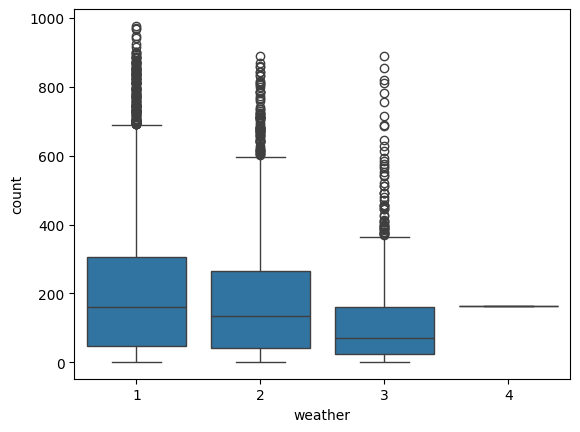

In [60]:
sns.boxplot(x = 'weather',  # Plotting the boxplot of weather and count
            y = 'count',
            data = df)

plt.show()  # Displaying the plot

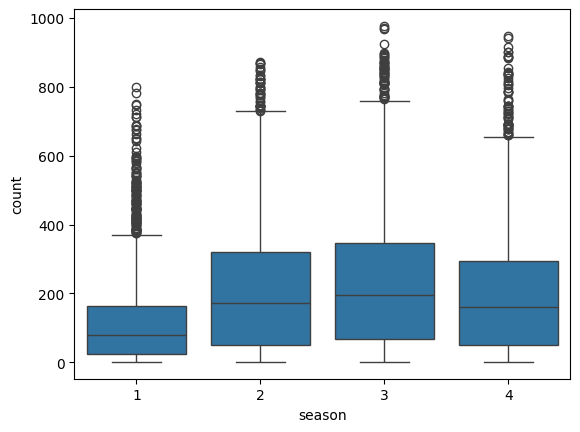

In [61]:
sns.boxplot(x = 'season',  # Plotting the boxplot of season and count
            y = 'count',
            data = df)

plt.show()  # Displaying the plot

**Observation-**
* There is no outlier in the temp column.
* There are few outliers present in humidity column.
* There are many outliers present in each of the columns : windspeed, casual, registered, count.
* count has outlier but we will retain because we want to do analysis on complete data.
* Removal of outlier may be cause the data loss that's why we are retaining it
* Each season has outliers we are retaing this in order to avoid the data loss.

**Relationship between Dependent and Independent Variables:**

In [62]:
corr_data = df.corr()
corr_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


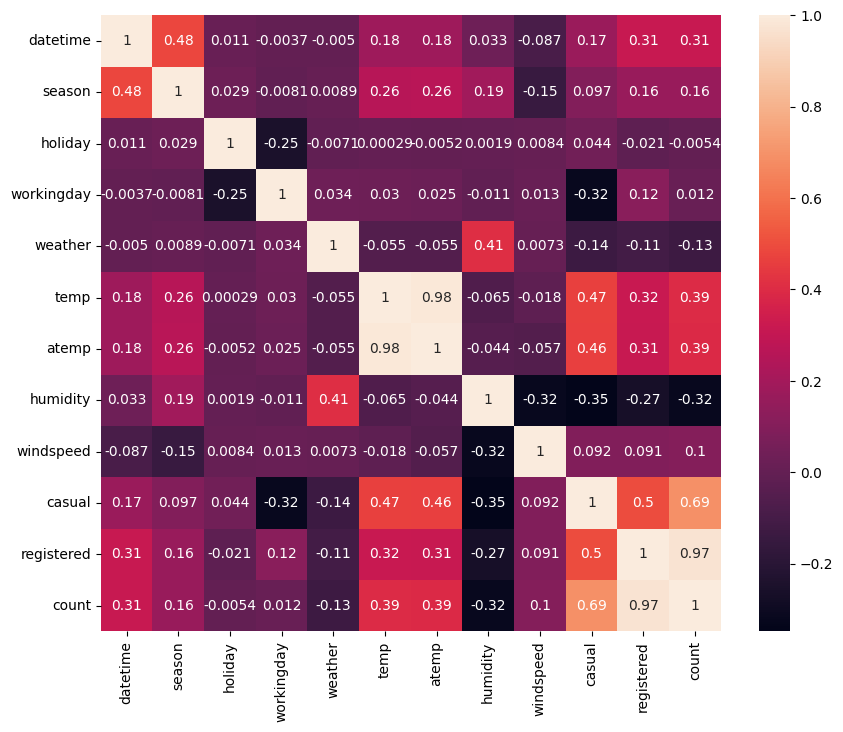

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Observation-
* Here, count column seems to have positive correlation with atemp and and negative with humidity. Although they around only 30-40%. But we can see people go out with bike more when the temp is high and humidity is low. Seems expected.
* Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
* High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
* Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
* Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
* Negligible correlation exists between all other combinations of columns.

# 2. Hypothesis Testing:

**Q1- Is any significant effect of Working Day on the number of bike rides?**

In [64]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

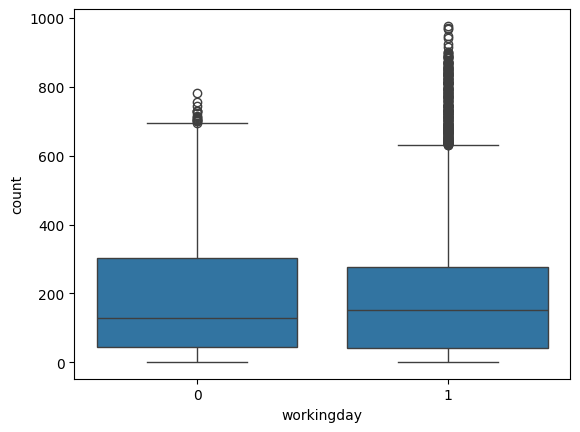

In [65]:

sns.boxplot(data = df,  # Plotting the boxplot for workingday
            x = 'workingday',
            y = 'count')

plt.plot()  # Displaying the plot

**STEP-1** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of electric cycles rented.

* **Alternate Hypothesis ( HA )** - Working Day has some effect on the number of electric cycles rented

**STEP-2** : Checking for basic assumpitons for the hypothesis

* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

**STEP-3**: Define Test statistics; Distribution of T under H0.

* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

**STEP-4**: Compute the p-value and fix value of alpha.

* We set our alpha to be 0.05
**STEP-5**: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.

1. **p-val > alpha** : Accept H0
2. **p-val < alpha** : Reject H0

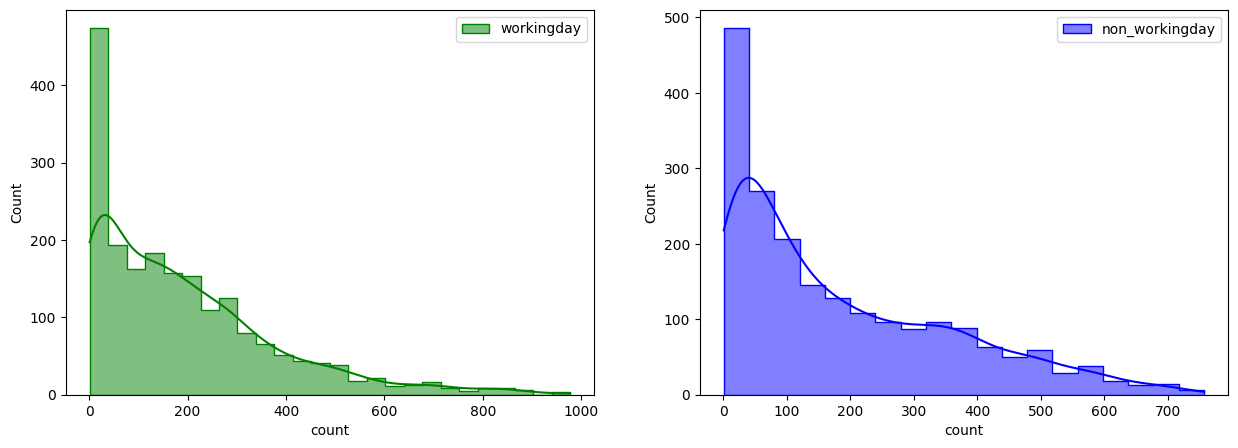

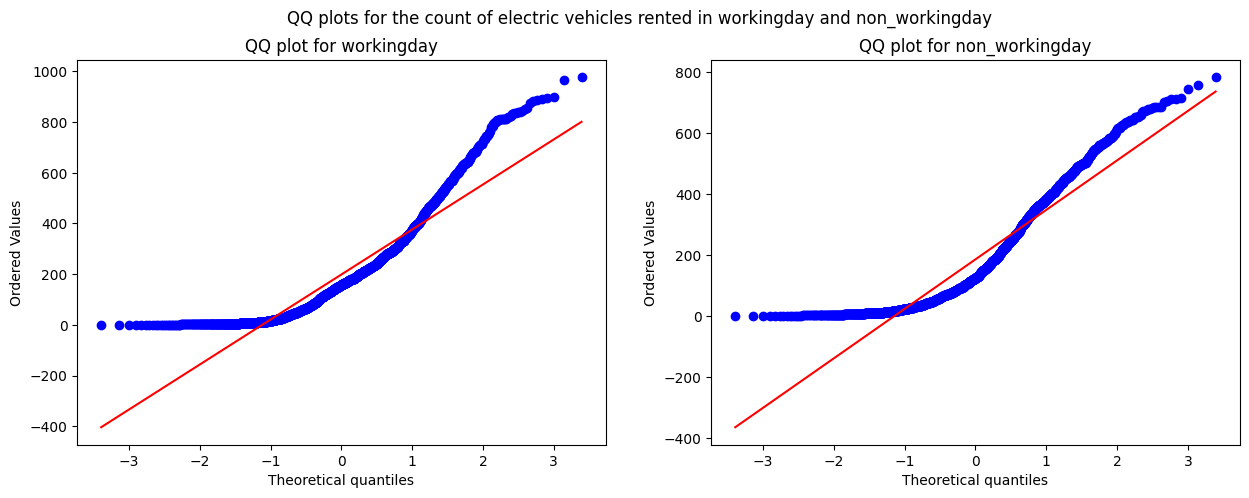

In [66]:
plt.figure(figsize = (15, 5))  # Plotting the matrix 15x5

plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),  # Histogram for working days
             element = 'step',
             color = 'green',
             kde = True,
             label = 'workingday')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),  # Histogram for non-working days
             element = 'step',
             color = 'blue',
             kde = True,
             label = 'non_workingday')
plt.legend()
plt.show()  # Displaying the plot

# QQ Plots
plt.figure(figsize = (15, 5))
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')

plt.subplot(1, 2, 1)
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),  # QQ plot for working days
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for workingday')

plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),  # QQ plot for non-working days
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for non_workingday')

plt.show()  # Displaying the plot

**Observation-**
* It can be inferred from the above plot that the distributions do not follow normal distribution.

**Next step-**
**Applying Shapiro-Wilk test for normality:**

 * H0: The sample **follows normal distribution**
 * Ha: The sample **does not follow normal distribution**
 * alpha = 0.05
 * Test Statistics : **Shapiro-Wilk test for normality**

In [67]:
# Applying Shapiro-Wilk test for normality for workingday
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for non workingday
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.2453638966721913e-37
The sample does not follow normal distribution

p-value 2.5941128960627553e-36
The sample does not follow normal distribution


**Next step-**
* Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

In [68]:
transformed_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


transformed_non_workingday = spy.boxcox(df.loc[df['workingday'] == 0, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.606448460668464e-33
The sample does not follow normal distribution

p-value 8.140931599634956e-24
The sample does not follow normal distribution


**Observation-**
* Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.

**Next step-**
* Homogeneity of Variances using Lavene's test.

In [69]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.535434233668757
The samples have Homogenous Variance 


**Next step-**

 **Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples:**

In [70]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject H0')
else:
    print('Fail to reject the H0')
    print("\nNo difference between workingday and overall bikes cycles mean.")
    print("So there is no significant difference of rented bikes between workingdays and not workingdays")

P-value : 0.9679139953914079
Fail to reject the H0

No difference between workingday and overall bikes cycles mean.
So there is no significant difference of rented bikes between workingdays and not workingdays


**Observation-**
* **Therefore, there is no significant difference of rented bikes between workingdays and not workingdays. In other words, there is no significant difference between the number of bike rides on Weekdays and Weekends.**

# Q2- Is the demand of bikes on rent the same for different Weather conditions?

In [71]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

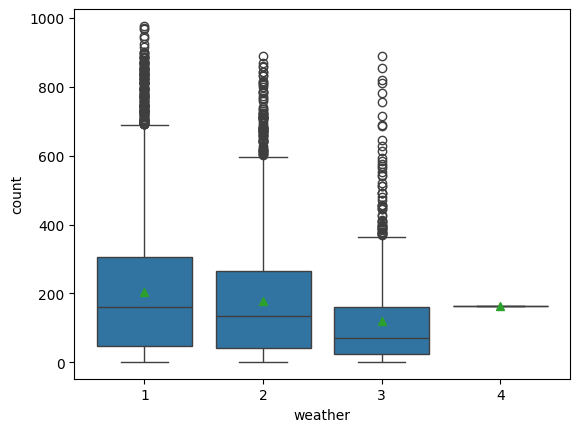

In [72]:
sns.boxplot(data = df,  # Plotting the boxplot for weather
            x = 'weather',
            y = 'count',
            showmeans = True)

plt.plot()  # Displaying the plot

In [73]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]

len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

**STEP-1 :** Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

**STEP-2** : Checking for basic assumpitons for the hypothesis

* Normality check using **QQ Plot**. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

* Homogeneity of Variances using **Levene's test**

* Each observations are **independent**.

**STEP-3**: Define **Test statistics**

* The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

* **F = MSB / MSW**

* Under H0, the test statistic should follow **F-Distribution**.

**STEP-4**: Decide the kind of test.

* We will be performing **right tailed f-test**

**STEP-5**: Compute the **p-value** and fix value of alpha.

* We will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our **alpha to be 0.05**

**STEP-6**: Compare **p-value** and alpha.

* Based on p-value, we will accept or reject H0.
* **p-val > alpha** : Accept H0
* **p-val < alpha** : Reject H0

[]

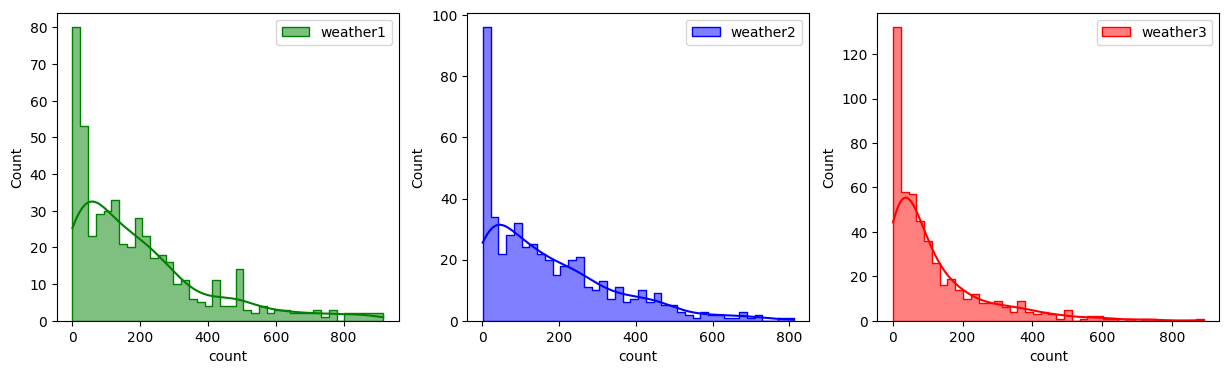

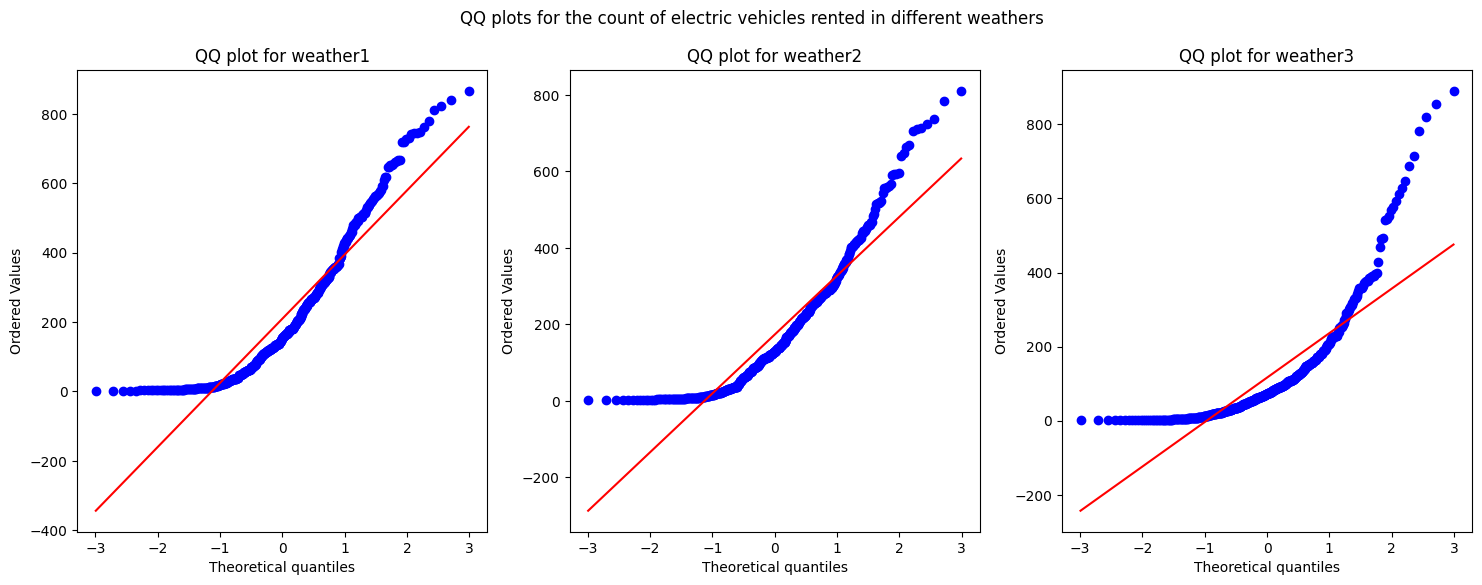

In [74]:
plt.figure(figsize = (15, 4))  # Plotting the matrix 15x4

plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,  # Histogram for weather1
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,  # Histogram for weather2
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,  # Histogram for weather3
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()

plt.plot()

plt.figure(figsize = (18, 6))  # Plotting the matrix 18x6

plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500),  # QQ plot for weather1
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for weather1')

plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500),  # QQ plot for weather2
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for weather2')

plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500),  # QQ plot for weather3
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for weather3')

plt.plot()  # Displaying the plot

**Observation-**

* It can be inferred from the above plot that the distributions do not follow normal distribution.

**Next step-**

* **Applying Shapiro-Wilk test for normality**
* **H0** : The sample **follows normal distribution**
* **Ha** : The sample **does not follow normal distribution**
* alpha = 0.05
* Test Statistics : **Shapiro-Wilk test for normality**

In [75]:
# Applying Shapiro-Wilk test for normality for weather1
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for weather2
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for weather3
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.410414942632575e-17
The sample does not follow normal distribution

p-value 1.176792343945415e-19
The sample does not follow normal distribution

p-value 4.717873990425999e-26
The sample does not follow normal distribution


**Next step-**

**Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [76]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')



transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')



transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.996724495960988e-27
The sample does not follow normal distribution

p-value 1.9245396515414659e-19
The sample does not follow normal distribution

p-value 1.4117548371138875e-06
The sample does not follow normal distribution


**Observation-**

**Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.**

**Next step-**

**Homogeneity of Variances using Levene's test.**

In [78]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.40308729657902e-12
The samples do not have Homogenous Variance


**Next step-**

**Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [79]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05

alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', test_stat)
print('\np value =', p_value)

Test Statistic = [1.36471292e+01 1.83091584e+00 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02]

p value = [1.08783632e-03 4.00333264e-01 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45]


In [80]:
if np.all(p_value) < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


**Observation-**

**Therefore, the average number of rental bikes is statistically different for different weathers.**

# Q3- Is any significant effect of Holiday on the number of bike rides?

In [81]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

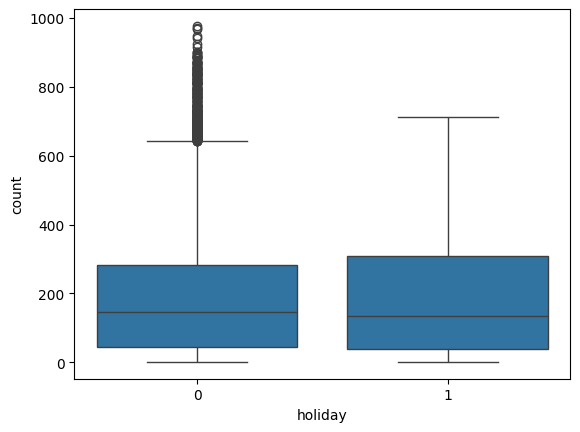

In [84]:
sns.boxplot(data=df,x='holiday',y='count')
plt.plot()


**STEP-1** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Holidays have no effect on the number of electric vehicles rented
* **Alternate Hypothesis ( HA )** - Holidays has some effect on the number of electric vehicles rented

**STEP-2** : Checking for basic assumpitons for the hypothesis

* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

**STEP-3**: Define Test statistics; Distribution of T under H0.

* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

**STEP-4**: Compute the** p-value** and fix value of alpha.

* We set our **alpha to be 0.05**

**STEP-5:** Compare **p-value** and alpha.

* Based on p-value, we will accept or reject H0.
  1. **p-val > alpha** : Accept H0
  2. **p-val < alpha** : Reject H0

[]

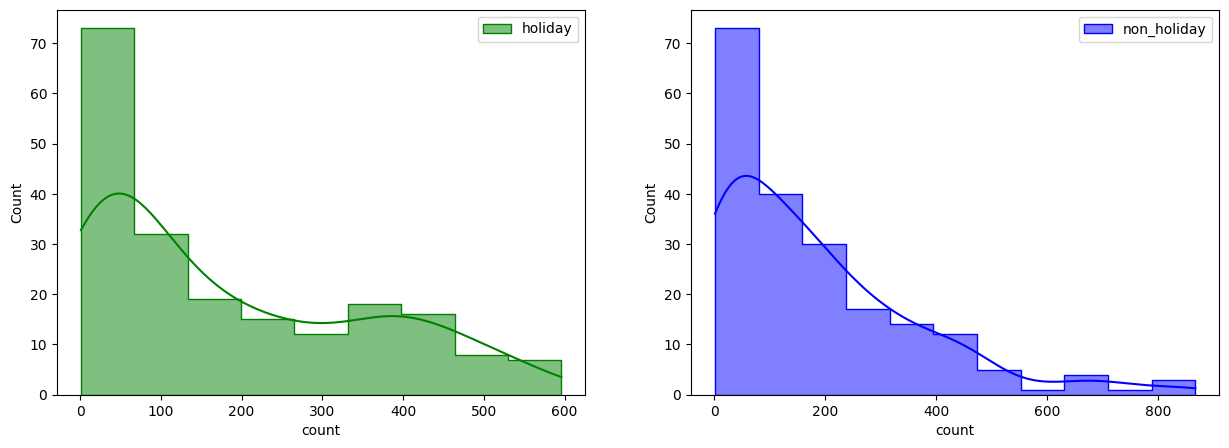

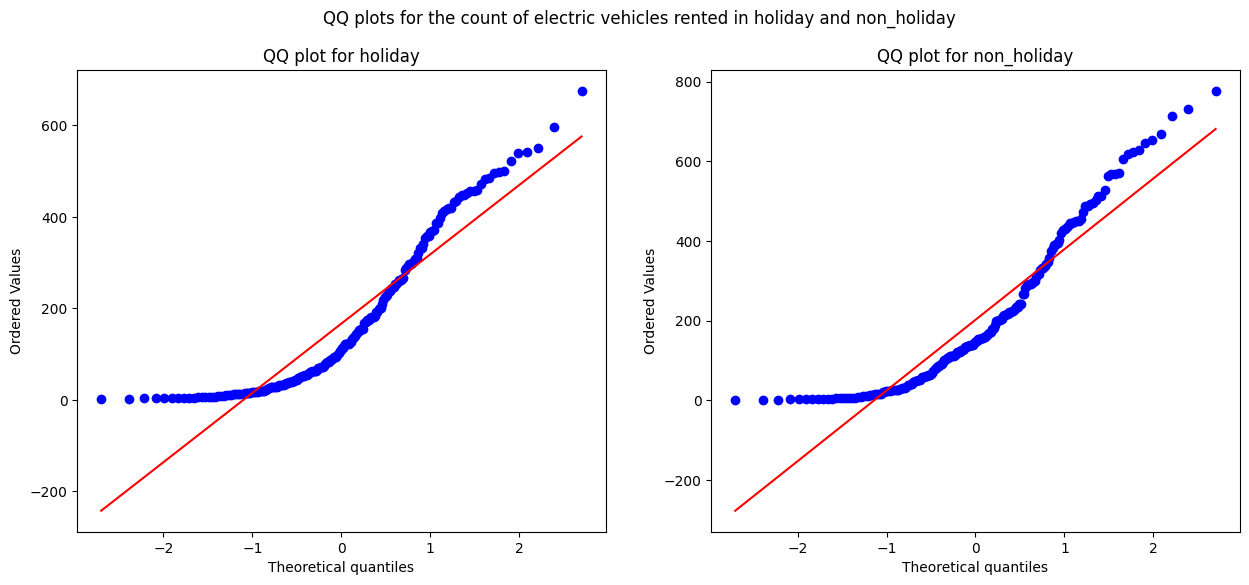

In [85]:
plt.figure(figsize = (15, 5))  # Plotting the matrix 15x10

plt.subplot(1, 2, 1)  # Plotting the histogram for holiday
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step',
             color = 'green',
             kde = True,
             label = 'holiday')
plt.legend()

plt.subplot(1, 2, 2)  # Plotting the histogram for non holiday
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step',
             color = 'blue',
             kde = True,
             label = 'non_holiday')
plt.legend()

plt.plot()  # Displying the plot
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)  # Plotting the QQ plot for holiday
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for holiday')

plt.subplot(1, 2, 2)  # Plotting the QQ plot for non holiday
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for non_holiday')

plt.plot()  # Displying the plot


**Observation-**
* **It can be inferred from the above plot that the distributions do not follow normal distribution.**

**Next step-**
 * **Applying Shapiro-Wilk test for normality.**

 * H0: The sample follows **normal distribution**
 * Ha: The sample **does not follow normal distribution**
 * **alpha = 0.05**
 * Test Statistics : **Shapiro-Wilk test for normality**

In [86]:
# Applying Shapiro-Wilk test for normality for holiday
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for non holiday
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.4070815165271745e-10
The sample does not follow normal distribution

p-value 1.9760233291027058e-12
The sample does not follow normal distribution


**Next step-**

* **Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [87]:
transformed_holiday = spy.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


transformed_non_holiday = spy.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1349336320530979e-07
The sample does not follow normal distribution

p-value 1.1757494106123018e-25
The sample does not follow normal distribution


**Observation-**

* **Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.**

**Next step-**

* **Homogeneity of Variances using Levene's test.**

In [88]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('\nThe samples do not have  Homogenous Variance')
else:
    print('\nThe samples have Homogenous Variance ')

p-value 0.36954971500030154

The samples have Homogenous Variance 


**Next step-**

* **Since the samples are not normally distributed and  have the same variance, f_oneway test can be performed here, we can perform for independent samples.**

In [89]:
f_oneway_test = spy.f_oneway(df.loc[df['holiday'] == 0, 'count'].sample(200),
                             df.loc[df['holiday'] == 1, 'count'].sample(200))

In [90]:
f_oneway_test

F_onewayResult(statistic=0.3046492363379771, pvalue=0.5812921253759105)

In [92]:
print('P-value :',f_oneway_test[1])
if f_oneway_test[1] < 0.05:
    print('\nNo.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('\nNo.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.5812921253759105

No.of electric cycles rented is similar for holidays and non-holidays


**Observation-**
* **Therefore, the number of rental bikes is statistically similar for both holidays and non - holidays.**

# Q4-Is the number of bikes rented is similar or different in different season?

In [93]:
df.groupby(by='season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [94]:
df_season_spring=df.loc[df['season']==1,'count']
df_season_summer=df.loc[df['season']==2,'count']
df_season_fall=df.loc[df['season']==3,'count']
df_season_winter=df.loc[df['season']==4,'count']

In [95]:
len(df_season_spring),len(df_season_summer),len(df_season_fall),len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

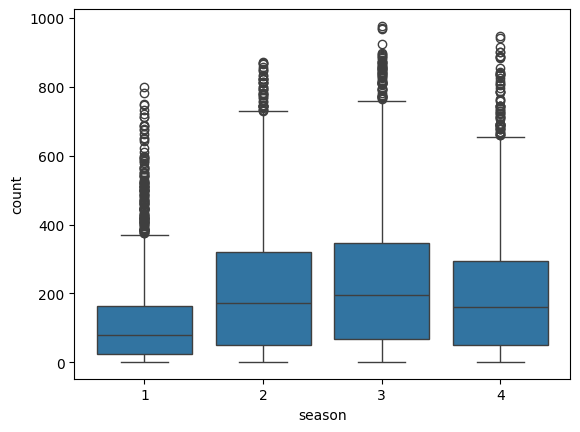

In [96]:
sns.boxplot(data=df , x='season',y='count')
plt.plot()

**STEP-1** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Mean of bike rented per hour is same for season 1,2,3 and 4.
* **Alternate Hypothesis ( HA )** -Mean of bike rented per hour is different for season 1,2,3 and 4.

**STEP-2** : Checking for basic assumpitons for the hypothesis

* **Normality check** using QQ Plot. If the distribution is not normal, use **BOX-COX** transform to transform it to normal distribution.

* Homogeneity of Variances using **Levene's test**
* Each observations are **independent**.

**STEP-3**: Define Test statistics

* The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.
* **F = MSB / MSW**
* Under H0, the test statistic should follow **F-Distribution**.

**STEP-4**: Decide the kind of test.

* We will be performing **right tailed f-test**

**STEP-5**: Compute the p-value and fix value of alpha.

* We will be computing the anova-test p-value using the **f_oneway** function using scipy.stats.
* We set our alpha to be **0.05**

**STEP-6**: Compare p-value and alpha.

 * Based on p-value, we will accept or reject H0.
 * p-val > alpha : Accept H0
 * p-val < alpha : Reject H0
The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

**µ1 = µ2 = µ3 = ..... = µk**

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

[]

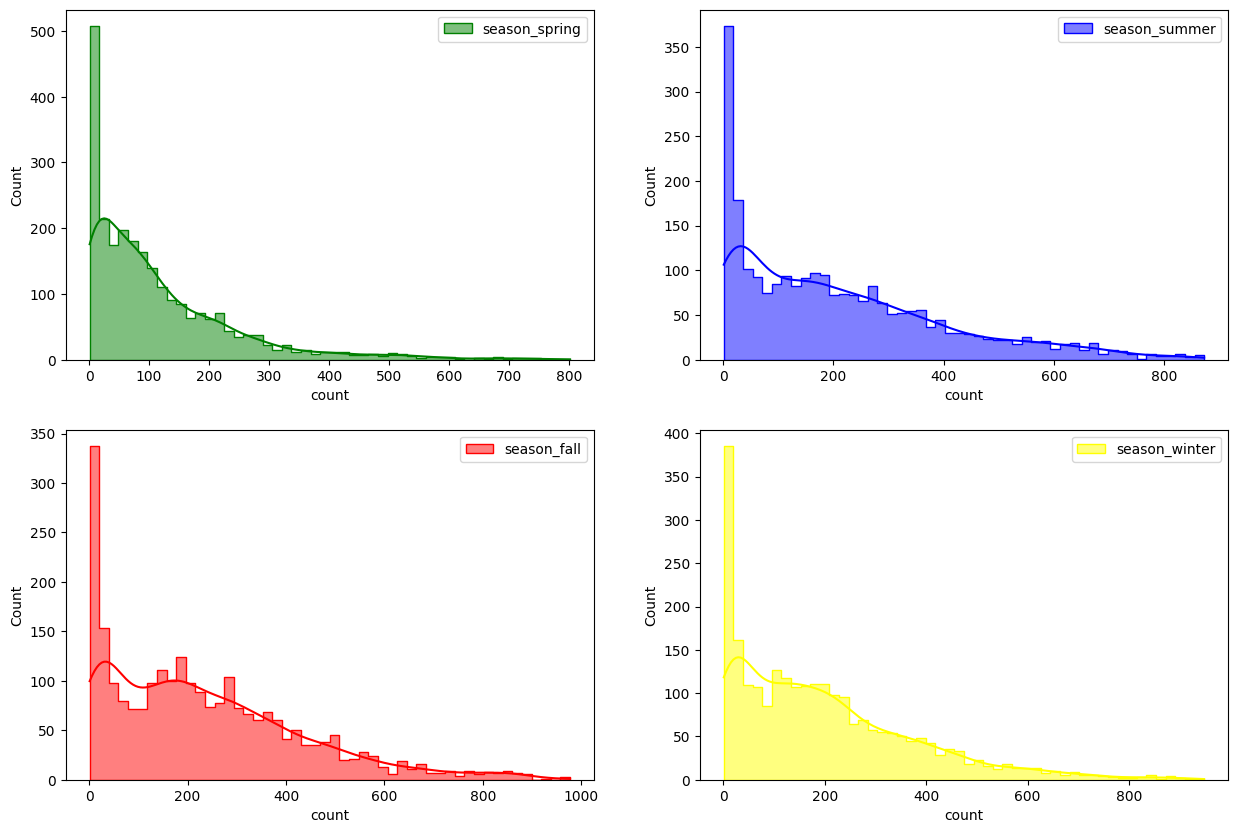

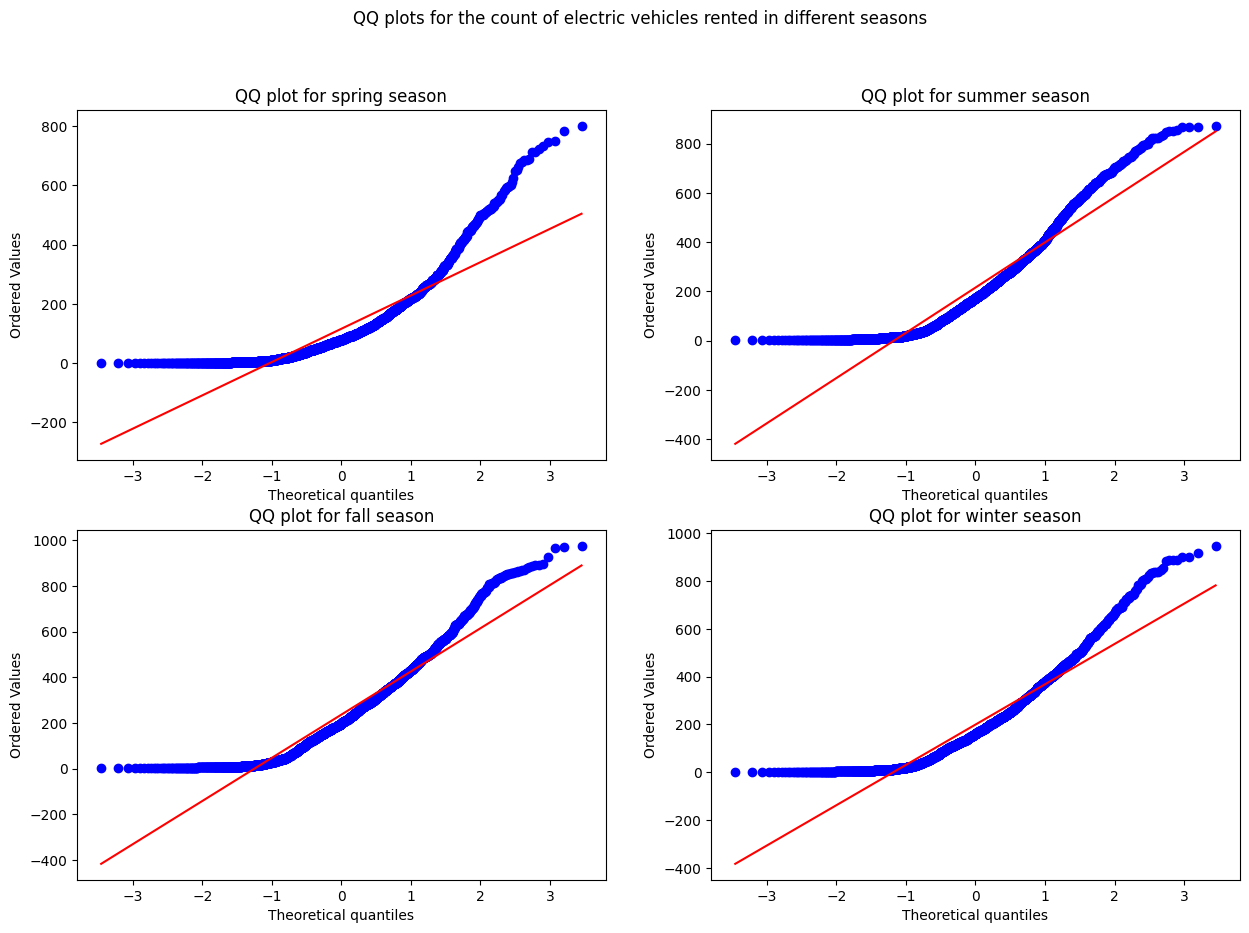

In [97]:
plt.figure(figsize = (15, 10))  # Plotting the matrix 15x10

plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500),  # Plotting the histogram for spring
             bins = 50,
             element = 'step',
             color = 'green',
             kde = True,
             label = 'season_spring')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500),  # Plotting the histogram for summer
             bins = 50,
             element = 'step',
             color = 'blue',
             kde = True,
             label = 'season_summer')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500),  # Plotting the histogram for fall
             bins = 50,
             element = 'step',
             color = 'red',
             kde = True,
             label = 'season_fall')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500),  # Plotting the histogram for winter
             bins = 50,
             element = 'step',
             color = 'yellow',
             kde = True,
             label = 'season_winter')
plt.legend()

plt.plot()  # Displaying the plot


plt.figure(figsize = (15, 10))  # Plotting the matrix 15x10

plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500),  # Plotting the QQ plot for spring
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500),  # Plotting the QQ plot for summer
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500),  # Plotting the QQ plot for fall
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500),  # Plotting the QQ plot for winter
             plot = plt,
             dist = 'norm')
plt.title('QQ plot for winter season')

plt.plot()  # Displaying the plot


**Observation-**
* **Visual Tests to know if the samples follow normal distribution.**

**Next step-**
* Applying **Shapiro-Wilk test for normality**
* H0 : The sample **follows normal distribution**
* Ha : The sample **does not follow normal distribution**
* alpha = 0.05
* Test Statistics : **Shapiro-Wilk test for normality**

In [98]:
# Applying Shapiro-Wilk test for normality for spring
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for summer
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for fall
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


# Applying Shapiro-Wilk test for normality for winter
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.2136021780415773e-47
The sample does not follow normal distribution

p-value 9.651386385265486e-38
The sample does not follow normal distribution

p-value 3.1748068401352414e-35
The sample does not follow normal distribution

p-value 2.2912196868446644e-38
The sample does not follow normal distribution


**Next step-**
* **Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [99]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


transformed_df_season_winter = spy.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_winter)
print('\np-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.4436487512675594e-16
The sample does not follow normal distribution

p-value 1.926410715980363e-21
The sample does not follow normal distribution

p-value 4.199451025634273e-21
The sample does not follow normal distribution

p-value 3.2491916539249406e-20
The sample does not follow normal distribution


**Observation-**

**Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.**

**Next step-**

**Homogeneity of Variances using Levene's test.**

In [100]:
# Null Hypothesis(H0) - Homogenous Variance
# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 5.064837031938737e-108
The samples do not have  Homogenous Variance


**Next step-**

**Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

In [101]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05

alpha = 0.05

test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)

print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [102]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


**Observaton-**
* **Therefore, the average number of rental bikes is statistically different for different seasons.**

# Q5- Is weather dependent on the season?

In [103]:
df[['weather','season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


**Observation-**
* *It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.*

**STEP-1** : Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Weather is independent of season
* **Alternate Hypothesis ( HA )** - Weather is dependent of seasons.

**STEP-2**: Define Test statistics

  * Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow **Chi-Square Distribution.**

**STEP-3**: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

  1. The data in the cells should be **frequencies**, or **counts** of cases.
  2. The levels (or categories) of the variables are **mutually exclusive**. That is, a particular subject fits into one and only one level of each of the variables.
  4. There are 2 variables, and both are measured as **categories**.
  5. The **value of the cell expecteds should be 5 or more **in at least 80% of the cells, and no cell should have an expected of less than one (3).

**STEP-4**: Compute the p-value and fix value of alpha.

  * We will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our **alpha to be 0.05**

**STEP-5**: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.
  1. **p-val > alpha** : Accept H0
  2. **p-val < alpha** : Reject H0
The **Chi-square statistic is a non-parametric** (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data

In [104]:
# First, finding the contingency table such that each value is the total number of total bikes rented
# for a particular season and weather

cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)

cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


**Observation-**
  * **Since the above contingency table has one column in which the count of the rented electric bike is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.**

In [105]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]

cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]])

In [106]:

chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)

print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : \n", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : 
 [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [107]:

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


**Observation-**
  * **Therefore, there is statistically significant dependency of weather and season based on the number of bikes rented.**

# Insights

* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

* Out of every 100 users, around 19 are casual users and 81 are registered users.

* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

* There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

* More than 80 % of the time, the temperature is less than 28 degrees celcius.

* More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

* More than 85 % of the total, windspeed data has a value of less than 20.

* The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

* There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

* The hourly total number of rental bikes is statistically different for different weathers.

* There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.

* The hourly total number of rental bikes is statistically different for different seasons.


# Recommendations

* ***Seasonal Marketing***: In summer and fall seasons the company should have morebikes in stock to be rented. Because the demand in the seseasons is higher as compared to other seasons. Offer seasonal discounts or special packages to attract more customers during these periods.

*  With a significance level of 0.05, workingday has no effect onthe number of bikes being rented.
*  In very low humid days, company should have less bikes in thestock to be rented.
*  Whenever temperature is less than 10 or in very cold days,company should haveless bikes.
*  Whenever the windspeed is greater than 35 or inthunderstorms, company should have less bikes in stock to berented
*  **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.
*  **Collaborations with Weather Services**: Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.
*  **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.
*  **Time-based Pricing**: Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can* encourage customers to rent bikes during less busy times*, balancing out the demand and optimizing the resources.
